# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("Yelp_Portfolio1_Input.csv")

 # Task 1: Check and remove missing data
 


a. Display columns and numbers of missing values & length of Raw Data
---

In [166]:
#Display only missing columns and their no. of missing values
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values != 0].reset_index(name = 'Count')
print("The columns with missing values are:")
missing_columns



The columns with missing values are:


,index,Count
0,business_categories,777
1,text,6


In [167]:
#Print the length of the data before removing the missing data
print("The length of the data is: ", len(data))

The length of the data is:  229907


b. Remove missing values and display length
---

In [168]:
#Output of cleaned data with no missing values
clean_data1 = data.dropna()
clean_data1

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,l5oUrgQ190l8CcN8uzd_pA,23/1/2011,1,My husband I stayed here for two nights. Of c...,2,dDNfSFT0VApxPmURclX6_g
229904,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,#NAME?,11/10/2010,4,Cool atmosphere. A lot of beers on tap and goo...,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,18/1/2011,3,I have to take a star off for the spotty servi...,2,jopndPrv-H5KW2CfScnw9A


In [169]:
#output the length of the resulting cleaned dataset
print("The length of the cleaned data is: ", len(clean_data1))

The length of the cleaned data is:  229124


c. Remove invalid values (#Name? & #VALUE!) and output its length
---

In [170]:
#remove "#NAME?" or "#VALUE!" in the business_id and user_id columns
clean_data2=clean_data1.drop(clean_data1.index[((clean_data1.business_id == '#NAME?') | (clean_data1.business_id == '#VALUE!')) |
                                               ((clean_data1.user_id == '#NAME?') | (clean_data1.user_id == '#VALUE!'))])
clean_data2

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...
229901,Event Planning & Services; Venues & Event Spaces,Phoenix,C1tH3sEQra33EOTk56Eu1Q,11/9/2008,3,I'm sorry to this but I must admit I was prett...,2,q9XgOylNsSbqZqF_SO3-OQ
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,l5oUrgQ190l8CcN8uzd_pA,23/1/2011,1,My husband I stayed here for two nights. Of c...,2,dDNfSFT0VApxPmURclX6_g
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,18/1/2011,3,I have to take a star off for the spotty servi...,2,jopndPrv-H5KW2CfScnw9A


In [171]:
#output the length of the resulting cleaned dataset
print("The length of the cleaned data is: ", len(clean_data2))

The length of the cleaned data is:  222759


# Task 2: Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.


a. Select 10 Random Cities from Unique Business Cities
---

In [172]:
#Unique value of cities
unique_cities = list(clean_data2['business_city'].unique())

In [173]:
# select a random subset of 10 cities and extract all the rows that correspond to businesses located in those cities.
import random
random.seed(42)
random_sample= random.sample(unique_cities, 10)
random_sample

['Ahwatukee',
 'Tolleson',
 'Tempe',
 'Saguaro Lake',
 'Cave Creek',
 'Goodyear',
 'Sun City',
 'Surprise',
 'Grand Junction',
 'Glendale']

b. Display dataframe of 10 random cities and output its Length
---

In [174]:
#sample dataframe
sample_data = clean_data2[clean_data2['business_city'].isin(random_sample)]
sample_data

,business_categories,business_city,business_id,date,stars,text,useful,user_id
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
13,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
32,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
50,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
53,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g
...,...,...,...,...,...,...,...,...
229884,Burgers; Restaurants,Glendale,sbnCG3-CouwIu0jsApfCsQ,26/2/2010,1,We ate at the Arrowhead Mall Johnny Rockets to...,0,mlY2rj2PBhK6-nlWjDMQIg
229889,Delis; Sandwiches; Restaurants,Tempe,cE99Cjrj2YXSGs4MECb86w,19/10/2007,3,You want a monster sandwich that will challeng...,6,tlSSQwfHYJany7wPoTH46A
229893,American (Traditional); Restaurants,Tempe,c8XlQvVNwKhH9BOHEObtNQ,16/12/2011,4,"Went for lunch at Claim Jumper, let me tell yo...",0,8dbRf1UsWp2ktXHZ6Zv06w
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ


In [12]:
print("The length of the sample data is: ", len(sample_data))

The length of the sample data is:  38654


# Task 3: Descriptive statistics on the data output from Task 2


a. Summary Statistics of Stars
---

In [175]:
#summary statistics stars
def summary(pre,s):
    print("{:5} Count:{:.2f} \n Mean{:.2f} \n Std:{:.2f} \n Min:{:.2f} \n Max: {:.2f}".format(pre,s.count(),s.mean(),s.std(),s.min(),s.max()))

summary('Summary Statistics of Stars in the Sample Data: \n', sample_data.stars)


Summary Statistics of Stars in the Sample Data: 
 Count:38654.00 
 Mean3.71 
 Std:1.24 
 Min:1.00 
 Max: 5.00


b. No. of unique businesses in each random city
---

In [176]:
#unique business in each city
count_unique =sample_data.groupby(['business_city'])['business_id'].nunique().reset_index(name = 'Count')
count_unique

,business_city,Count
0,Ahwatukee,3
1,Cave Creek,62
2,Glendale,580
3,Goodyear,120
4,Grand Junction,1
5,Saguaro Lake,1
6,Sun City,27
7,Surprise,151
8,Tempe,1119
9,Tolleson,22


c. Summary Statistics of Business City Count column
---

In [177]:
#summary statistics for the count column
def summary(pre,s):
    print("{:5} Count:{:.2f} \n Mean{:.2f} \n Std:{:.2f} \n Min:{:.2f} \n Max: {:.2f}".format(pre,s.count(),s.mean(),s.std(),s.min(),s.max()))

summary('Summary Statistics of Unique Businesses in the Sample Data: \n', count_unique.Count)



Summary Statistics of Unique Businesses in the Sample Data: 
 Count:10.00 
 Mean208.60 
 Std:364.49 
 Min:1.00 
 Max: 1119.00


d. Unique Users who Rated the Businesses
---

In [178]:
#unique users from Business Category and Business Id
unique_users =sample_data.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index(name = 'Count')
unique_users

,business_categories,business_id,Count
0,Accessories; Fashion; Shopping; Cosmetics & Be...,F-HBLqU3Kvs89lkQ5CjLBQ,4
1,Active Life,HwjPC5yhvM2blTpmvlhZ2A,4
2,Active Life,RFAcGpV3m63LbUG-pi0Evg,11
3,Active Life,i2jU_fUdN5xnwXwoOtRDoA,11
4,Active Life,kJEPUMn279P_GzFMCr5l0g,5
...,...,...,...
2081,Women's Clothing; Men's Clothing; Fashion; Sho...,wdV0pJ4xNi60bME_pXK2dA,5
2082,Women's Clothing; Thrift Stores; Shopping; Fas...,kBboKZCqHsXOO8ooLeMJYA,5
2083,"Women's Clothing; Used, Vintage & Consignment;...",toaTvg00twp1w95tDuhU3Q,3
2084,"Women's Clothing; Used, Vintage & Consignment;...",wNm84v3I4ZONS9H8Vs-wkQ,8


e. Summary Statistics of Unique Users and its length
---

In [179]:
#summary statistics for the Unique Users column
def summary(pre,s):
    print("{:5} Count:{:.2f} \n Mean{:.2f} \n Std:{:.2f} \n Min:{:.2f} \n Max: {:.2f}".format(pre,s.count(),s.mean(),s.std(),s.min(),s.max()))

summary('Summary Statistics of Unique Users in the sample data: \n', unique_users.Count)

Summary Statistics of Unique Users in the sample data: 
 Count:2086.00 
 Mean18.53 
 Std:38.02 
 Min:2.00 
 Max: 718.00


In [180]:
print("The number of unique users that have rated the businesses is: ", len(unique_users))

The number of unique users that have rated the businesses is:  2086


# Task 4: Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Task 1 and the sampled dataset from Task 2.

a. Bar Plot of 10 Cities with the Most No. of Businesses
---

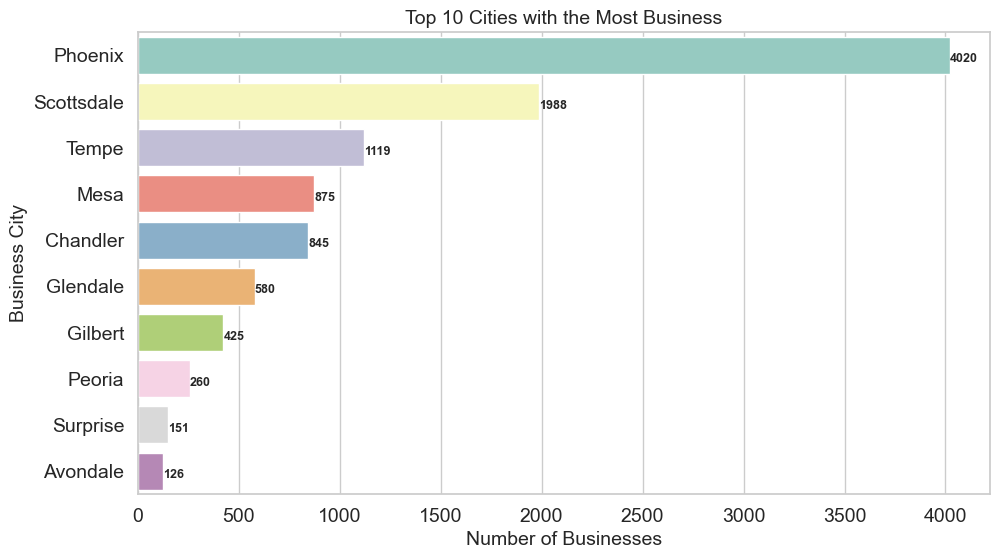

In [127]:
#Box Plot of Top 10 Cities with the Most Businesses
plt.figure(figsize=(11,6))
TopCities = clean_data2.groupby('business_city')['business_id'].nunique().sort_values(ascending = False)[:10]
sns.barplot(y=TopCities.index, x= TopCities.values, palette= sns.color_palette("Set3", len(TopCities)) )
plt.ylabel('Business City', fontsize=14)
plt.xlabel('Number of Businesses', fontsize=14)
plt.title('Top 10 Cities with the Most Business', fontsize=14)
for i,v in enumerate(TopCities):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=9)
plt.tick_params(labelsize=14)


Findings:
---

The bar plot above shows the top ten (10) cities in Arizona, United States with the most number of unique businesses. It shows that Phoenix is the top one (1) city with 4,020 businesses, followed by Scottsdale (1,988), and  Tempe (1,119). It is evident to say that Phoenix has the most number of businesses among all cities since it is the largest city in Arizona.

b. Box Plot of Star Ratings from the Cleaned Data in Q.1
---

<AxesSubplot:title={'center':'Star Ratings of All Cities'}, xlabel='business_city', ylabel='stars'>

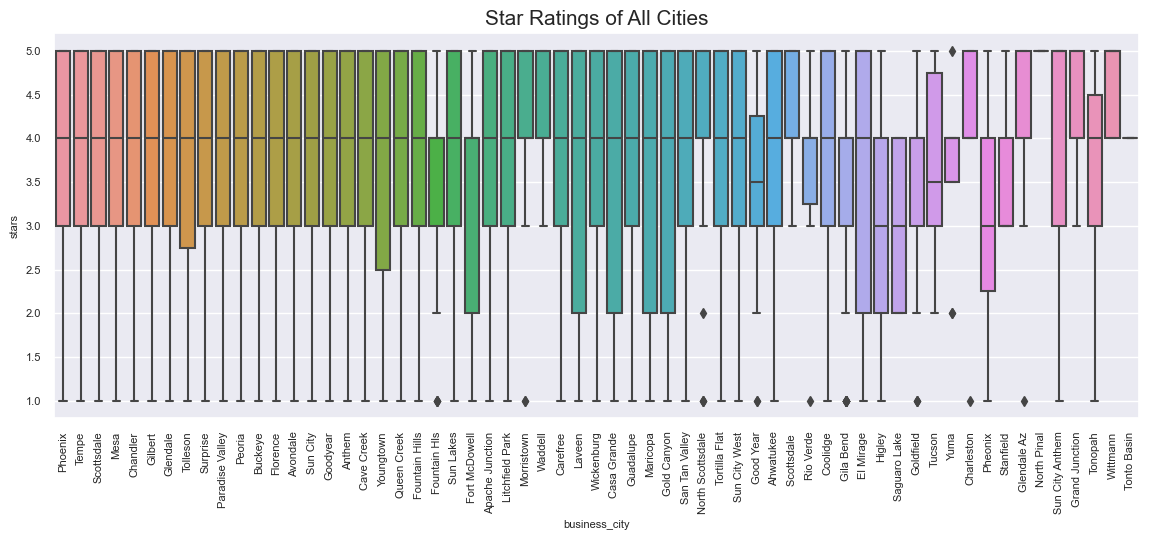

In [125]:
#Boxplot of star ratings for all cities 
AllCityRatings = clean_data2.drop(['business_categories','business_id', 'date', 'text', 'useful', 'user_id'], axis = 1)
plt.figure(figsize=(14,5))
plt.title('Star Ratings of All Cities', size = 15)
plt.xticks(rotation = 90)
sns.set_style("whitegrid")
sns.boxplot(x = 'business_city', y = 'stars', data = AllCityRatings)


### Findings:
---

The boxplot above shows the Star Ratings of all unique cities within Arizona. Firstly, it tells us that the median of Stars for majority of cities is at 4 which is above average. This means that most customers have rated the restaurants between 3-5 stars in majority of the cities. It shows that several customers are highly satisfied with their experience with these businesses. Although most businesses in these cities have above average ratings, there are also other cities whose businesses are in the 2-4 star ratings (i.e. Higley, Sagurao Lake), performing lower than other businesses. Secondly, multiple number of boxplots have similar spread from 1 to 5, although there are other cities where they did not experience any ratings below 3 (i.e. Waddell, Stanfield, Charlston) . Moreover, there are also outliers present in some cities (i.e. Fountain Hills, Morristown, North Scottsdale).




c. Box Plot of  Star Ratings from 10 Random Cities from the Sample Data in Q.2
---

<AxesSubplot:title={'center':'Star Ratings of 10 Sample Cities'}, xlabel='business_city', ylabel='stars'>

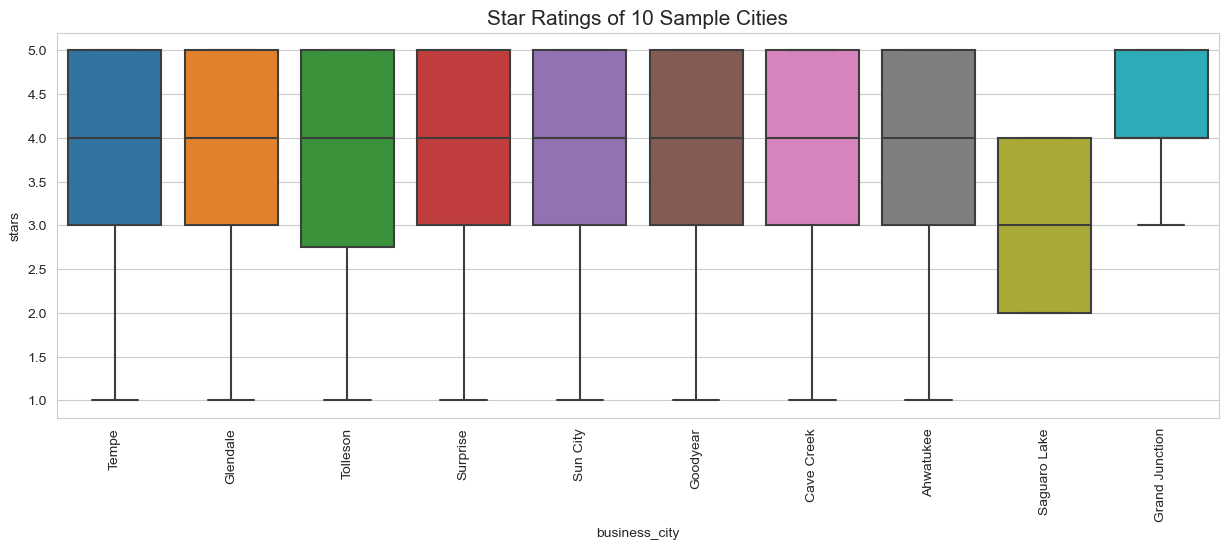

In [46]:
#Boxplot of star ratings for 10 random cities
plt.figure(figsize=(15,5))
plt.title('Star Ratings of 10 Sample Cities', size = 15)
plt.xticks(rotation = 90)
sns.boxplot(x = 'business_city', y = 'stars', data = sample_data)

Findings:
---

From the boxplot above, we can get similar findings from the previous boxplot. The median of Star Ratings across all cities except Sagurao Lake is at 4 which means that most businesses are performing satisfactorily between 3-5 star ratings, similar to the previous findings. On the otherhand, Sagurao Lake's median is at 3, with minimum and maximum star ratings at 2 and 4 respectively. Overall the boxplot shows that customers tend to rate the businesses above average, which means most customers are satisfied with their experience with these businesses.





d. Bar Plot of Percentage of Reviews for Each Star in Q.1 Clean Data 
---

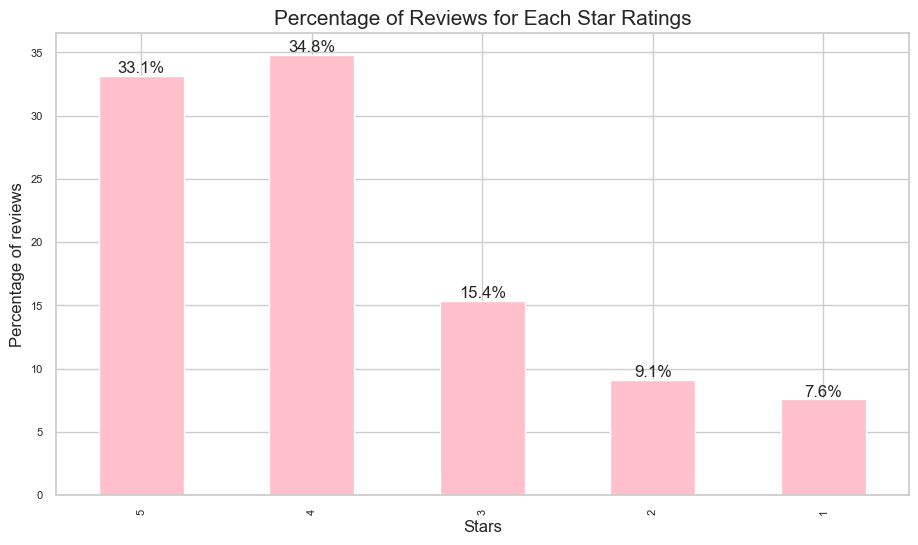

In [131]:
#Graph of average reviews for each star rating
CStar = clean_data2['stars'].value_counts()
CstarPercentage = CStar.apply(lambda i : i / len(clean_data2) * 100)
plt.figure(figsize=(11,6))
ax = CstarPercentage.sort_index(ascending=False).plot(kind = 'bar', color = "pink")
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.title('Percentage of Reviews for Each Star Ratings', fontsize=15)
plt.ylabel('Percentage of reviews', fontsize=12)
plt.xlabel('Stars', fontsize=12);


Findings:
---

The figure above shows the percentage of reviews for each Star Rating in the clean data set.
- 34.8% of the reviews come from 4 Stars
- 33.1% is from 5 stars
- 15.4% is from 3 stars
- 9.1% is from 2 stars
- 7.6% is from 1 star

This means that higher number of reviews are being written under the 4 to 5 star ratings. This can mean that consumers are more likely to leave a review if they have a great experience from a particular business.

e. Bar Plot of Top 10 Categories with Most Reviews (Clean Data & Sample Data)
---

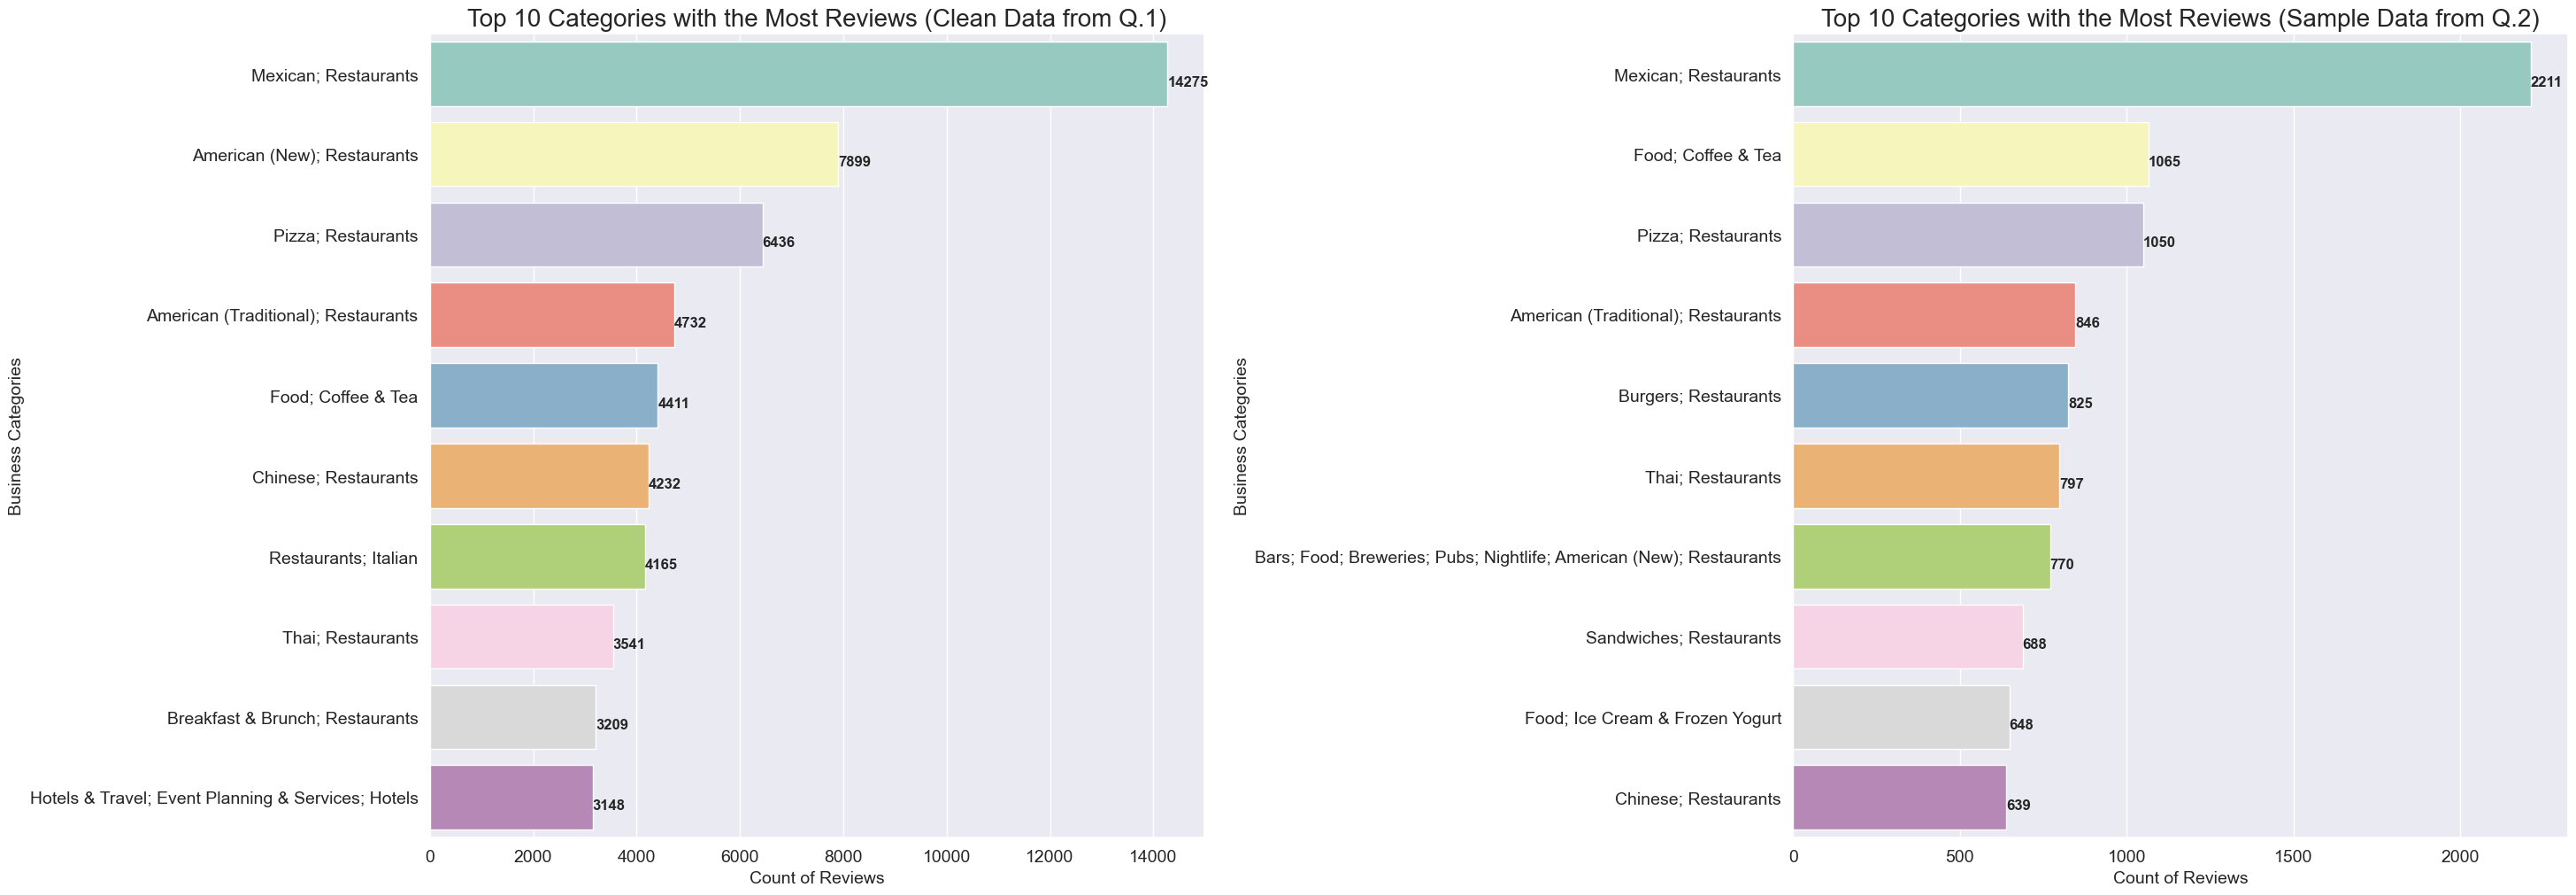

In [183]:
#Box Plot of Top 10 Categories with the Most Reviews from Clean Data Q2

plt.figure(figsize=(29,10), constrained_layout=True)

plt.subplot(1, 2, 1)
grouped = clean_data2.groupby('business_categories')['text'].nunique().sort_values(ascending = False)[:10]
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("Set3", len(grouped)) )
plt.ylabel('Business Categories', fontsize=14)
plt.xlabel('Count of Reviews', fontsize=14)
plt.title('Top 10 Categories with the Most Reviews (Clean Data from Q.1)', fontsize=20)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=12)
plt.tick_params(labelsize=14)

#Box Plot of Top 10 Categories with the Most Reviews from Sample Data Q3
plt.subplot(1, 2, 2)
grouped2 = sample_data.groupby('business_categories')['text'].nunique().sort_values(ascending = False)[:10]
sns.barplot(y=grouped2.index, x= grouped2.values, palette= sns.color_palette("Set3", len(grouped2)) )
plt.ylabel('Business Categories', fontsize=14)
plt.xlabel('Count of Reviews', fontsize=14)
plt.title('Top 10 Categories with the Most Reviews (Sample Data from Q.2)', fontsize=20)
for i,v in enumerate(grouped2):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=12)
plt.tick_params(labelsize=14)

Findings:
---

The bar plot above describes the top ten (10) business categories with the most reviews or customer feedback for both Clean Data from Question 1 and Sample Data from Question 2. 

In the clean data (Left Bar Plot), the top most reviewed type of business is Mexican Restaurants with a total of 14,275 reviews. It is followed by New American Restaurants at 7,899, and then Pizza Restaurants at 6,436. Looking at the figure tells us that 9 out of 10 businesses are in the Restaurant category which means that majority of customers usually provide reviews about their food experiences. Additonally, "Hotels and Travel; Event Planning & Services; Hotels" ranked 10th with 3,148 reviews. 


On the other hand, the top most reviewed type of business in the sample data (Right Bar Plot) is also Mexican Restaurants with a total of 2,211 reviews. It is followed by Food, Coffee and Tea at 1,065, and then Pizza Restaurants at 1,050. In this diagram, 9 out of 10 categories are from the food industry. 

Overall, we can conclude that people in Arizona are more likely to leave reviews on restaurants and hotel/travel service providers. The most reviewedd business category is Mexican restaurants. 

f. Scatter Plot of Reviews vs. Useful Votes (Cleaned Data vs. Sample Data)
---

<AxesSubplot:xlabel='Total No. of Reviews_Sample Data', ylabel='Total Useful Votes_Sample Data'>

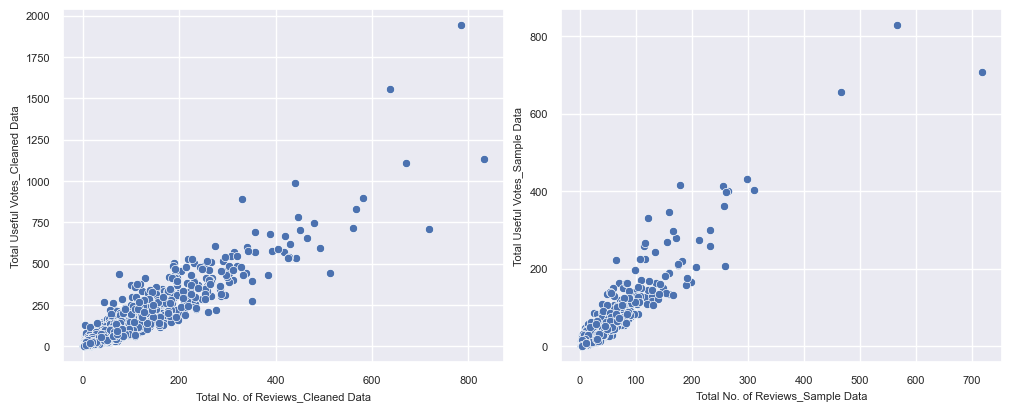

In [186]:
#Dataframe from Clean_Data2

#Total Count of Reviews from the Clean Data2 DataFrame
CTotalReviews = clean_data2.groupby(['business_id'])['text'].count().reset_index(name = 'Total No. of Reviews_Cleaned Data')

#Total Useful Votes from the Clean Data2 DataFrame
CTotalUseful = clean_data2.groupby(['business_id'])['useful'].sum().reset_index(name = 'Total Useful Votes_Cleaned Data')

#Total Reviews and Useful Votes from the Clean Data2 Dataframe
CTotal_ReviewUsefulVotes = pd.merge(CTotalReviews,CTotalUseful)

#Dataframe from Sample Data

#Total Count of Reviews from the Sample Data DataFrame
STotalReviews = sample_data.groupby(['business_id'])['text'].count().reset_index(name = 'Total No. of Reviews_Sample Data')

#Total Useful Votes from the Clean Data2 DataFrame
STotalUseful = sample_data.groupby(['business_id'])['useful'].sum().reset_index(name = 'Total Useful Votes_Sample Data')

#Total Reviews and Useful Votes from the Clean Data2 Dataframe
STotal_ReviewUsefulVotes = pd.merge(STotalReviews,STotalUseful)

#Scatter Plot Side by Side

sns.set()
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=False, constrained_layout=True)
sns.scatterplot(data = CTotal_ReviewUsefulVotes, x = 'Total No. of Reviews_Cleaned Data', y = 'Total Useful Votes_Cleaned Data', ax=axes[0])
sns.scatterplot(data = STotal_ReviewUsefulVotes,  x = 'Total No. of Reviews_Sample Data', y = 'Total Useful Votes_Sample Data', ax=axes[1])

Findings:
---

The two figures above are scatterplot diagrams which describe the correlation between the No. of Reviews and Useful Votes. The left graph shows data from the cleaned dataframe in Q2, while the right figure shows data from the sample dataframe from Q3. Both figures tell us that there is a strong positive correlation between the No. of Reviews and Useful Votes. As more reviews are being added by customers, more people are finding them useful. 

Overall Summary:
---

In general, majority of the businesses across the cities have high star ratings between 3-5 eventhough some cities have larger distribution in terms of number of users or customers compared to others. Customers are more likely to give high stars between 3-5 on any business regardless of the city or location. 

In terms of reviews, majority of the consumers like to provide reviews on restaurants and hotel/travel services. This means that consumers are more likely to place a review if it is about food or their hotel/Travel experiences. Furthermore, there is a positive relation between the number of reviews and the number of useful votes. The number of Useful votes will more likely increase as the number of reviews increases. Additionally, people are more likely to leave reviews if they have a positive experience with the business.


It is also interesting to note that the top city with the most number of businesses is Phoenix. The top business category with the most reviews is Mexican Restaurants. This is most probably because majority of residents in Arizona are Hispanic. 

Overall, this Yelp Analysis can provide several insights on how to understand consumer behaviors, sales performances, and economic conditions of cities. It can be used by marketers, business owners, policy makers to better understand market profiles and make informed decisions.


